In [7]:
import numpy as np

np.random.seed(123)
seqA = "C"
seqB = "C"
seqC = "A"

#k1 = root height - internal node height
#k2 = internal node height
# Kingman’s n-coalescent, prob(k1,y,T), where T defines y and k1  
def prob(k1, k2):
    Ne = 1 # 2N
    # exp(−u_k * k(k−1) / 2) = -y*3*(3-1)/2 or -k1*2*(2-1)/2
    p = (1/Ne) * np.exp(-3*k2/Ne) * (1/Ne) * np.exp(-k1/Ne) 
    return p
    
#T = 0,1,2 three topologies
#w = jump size of random walk 
# propose
def getProposal(k1, k2, T, w):
    k1_ = k1; k2_ = k2; T1 = T
    rand = np.random #.uniform(0, 1) [0, 1)
    # radius
    _r = rand.uniform(0, w) - w/2
    # angle
    _theta = rand.uniform(0, 2*np.pi) # w?
    #change k1        
    k1_ = k1 + _r * np.sin(_theta)
    #change k2
    k2_ = k2 + _r * np.cos(_theta)
    
    #change T
    if (k1_ < 0 or k2_ < 0):
        if (rand.uniform(0, 1) > 0.5):
            T1 = np.mod((T+1), 3)
        else:
            T1 = np.mod((T+2), 3)
        k1_ = abs(k1_)
        k2_ = abs(k2_)
    
    return k1_, k2_, T1

# evaluate proposal
def accept(k1, k2, k1_, k2_):
    if (k1_ < 0 or k2_ < 0):
        return False #reject
    ratio = prob(k1_,k2_) / prob(k1,k2) 
    if (ratio > np.random.uniform(0, 1)):
        return True  #accept
    else:
        return False #reject

# MCMC sampling
samples = 1000
listK1, listK2, listT = ([] for i in range(3))
k1 = k2 = 1 
#i = num of samples
T = i = reject= 0
w = 1
while i < samples:    
    k1_, k2_, T1 = getProposal(k1, k2, T, w)
    isAccepted = accept(k1, k2, k1_, k2_)
    if (isAccepted):
        k1 = k1_;
        k2 = k2_;
        T = T1;
    else:
        reject += 1
    listK1.append(k1)
    listK2.append(k2)
    listT.append(T)
    i += 1


from operator import add
max_k1 = max(listK1)
max_k2 = max(listK2)
tree_height = map(add, listK1, listK2)
max_tree_height = max(tree_height)

print("sample size =", samples, "; max k1 =", max_k1, "; max k2 =", max_k2, "; max tree height =", max_tree_height)
print("jump size of random walk =", w, "; rejection rate =", "{0:.0%}".format(reject/samples))
print("len(k1)", len(listK1), "== len(k2)", len(listK2), "is", len(listK1) == len(listK2))
print(*listK1, sep=', ')
print(*listK2, sep=', ')
print(*listT, sep=', ')

sample size = 1000 ; max k1 = 4.279122225070414 ; max k2 = 1.8348323771745176 ; max tree height = 4.853098871677298
jump size of random walk = 1 ; rejection rate = 22%
len(k1) 1000 == len(k2) 1000 is True
1.191425852573307, 1.1410523721117314, 0.7000333162822268, 0.6101174868271707, 0.587620057604725, 0.8045247611232604, 0.7982571316844657, 0.4533165170746123, 0.652793800628753, 0.39124266822529896, 0.39124266822529896, 0.3884051547593786, 0.4341316273135882, 0.4328414734397288, 0.4328414734397288, 0.4328414734397288, 0.4201502111295733, 0.2232913551074943, 0.07505889743954738, 0.05277159066778586, 0.007957873750592426, 0.423223498644474, 0.5576725276957959, 0.2813824915961288, 0.2813824915961288, 0.0016592647145352024, 0.17097897924045477, 0.22131197805824743, 0.18274064346986552, 0.18274064346986552, 0.3263782086700616, 0.482262544183905, 0.2665265237947722, 0.3694017525749789, 0.3694017525749789, 0.3272081520718399, 0.18192492843333816, 0.4612669425940249, 0.4506716210999933, 0.1770

0.9557701022376317, 0.9459865450002205, 0.7545801531433806, 0.8141936876300951, 0.7570339570317012, 0.8549837540763738, 0.8240611731277305, 0.7682171841495123, 0.6697800377303739, 0.7434813052283934, 0.7434813052283934, 0.7491228040555571, 0.6913887612919014, 0.6900815194298616, 0.6900815194298616, 0.6900815194298616, 0.6752963331427762, 0.415017811399012, 0.4674615952353605, 0.5960280527089, 0.5352249013289353, 0.499435537927362, 0.7740681223458332, 0.5054781392874246, 0.5054781392874246, 0.3103795983783685, 0.37500499957060046, 0.2760173022664037, 0.13873035410325799, 0.13873035410325799, 0.12738241223800703, 0.23896042784274316, 0.38253492157783614, 0.5136090533537108, 0.5136090533537108, 0.5461058970677936, 0.6577278463945747, 0.48370725763156197, 0.4058736382599105, 0.8103628250576158, 0.8103628250576158, 0.78745301118011, 0.5456467485887068, 0.5456467485887068, 0.5456467485887068, 0.5456467485887068, 0.6636629912720091, 0.5971150083746078, 0.5971150083746078, 0.5971150083746078, 

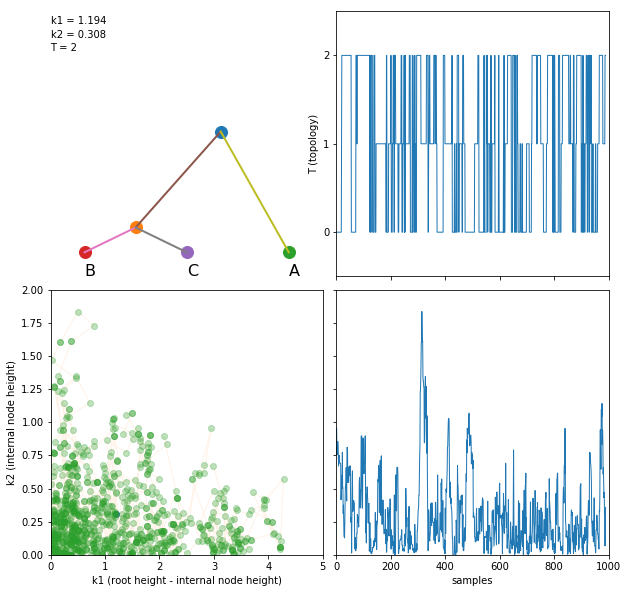

In [9]:
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure(figsize=(10,10))
k1_width = (0, np.ceil(max_k1))
k2_width = (0, np.ceil(max_k2))
tree_width = (0, 2)
tree_height = (-0.3, 3)
states_width = (0, samples)
# tree panel
ax1 = fig.add_subplot(221, xlim=tree_width, ylim=tree_height)
ax1.axis('off')
# topology trace
ax2 = fig.add_subplot(222, xlim=states_width, ylim=(-0.5, 2.5), ylabel='T (topology)')
ax2.set_xticklabels([])
ax2.yaxis.set_ticks(np.arange(0, 3, step=1))
# x, y
ax3 = fig.add_subplot(223, xlim=k1_width, ylim=k2_width, xlabel='k1 (root height - internal node height)', 
                      ylabel='k2 (internal node height)')
# y trace
ax4 = fig.add_subplot(224, xlim=states_width, ylim=k2_width, xlabel='samples')
ax4.set_yticklabels([])
fig.subplots_adjust(wspace=0.05, hspace=0.05)

line1, = ax2.plot([], [], lw=1)
line2, = ax4.plot([], [], lw=1)
# dot
line3, = ax3.plot([], [], 'o', lw=3)
line4, = ax3.plot([], [], lw=1, alpha=.1)
line5, = ax3.plot([], [], 'o', alpha=.3)
# tree topology based on (A,B),C => A 3, B 4, C 5, AB, 2, ABC 1
node1, = ax1.plot([], [], 'o', lw=2, markersize=12)
node2, = ax1.plot([], [], 'o', lw=2, markersize=12)
node3, = ax1.plot([], [], 'o', lw=2, markersize=12)
node4, = ax1.plot([], [], 'o', lw=2, markersize=12)
node5, = ax1.plot([], [], 'o', lw=2, markersize=12)
edge12, = ax1.plot([], [], lw=2)
edge23, = ax1.plot([], [], lw=2)
edge24, = ax1.plot([], [], lw=2)
edge15, = ax1.plot([], [], lw=2)
lines = [line1, line2, line3, line4, edge12, edge23, edge24, edge15, 
         node1, node2, node3, node4, node5]
# text
k1_text = ax1.text(0, 0.95, '', transform=ax1.transAxes)
k2_text = ax1.text(0, 0.90, '', transform=ax1.transAxes)
T_text = ax1.text(0, 0.85, '', transform=ax1.transAxes)

### fix tips, move root and internal node

x3 = 0.25; x4 = 1.0; x5 = 1.75; y = 0; y_lab_adj = 0.3
tip3_label = ax1.text(x3, y-y_lab_adj, 'A', fontsize=16)
tip4_label = ax1.text(x4, y-y_lab_adj, 'B', fontsize=16)
tip5_label = ax1.text(x5, y-y_lab_adj, 'C', fontsize=16)

# tree T=0 : (A,B),C => A 3, B 4, C 5
# tree T=1 : (A,C),B => A 3, B 5, C 4
# tree T=2 : (B,C),A => A 5, B 3, C 4
def plotTipsByTopology(T):
    #change label based on T
    if (T==0):
        node3.set_data(x3, y) # tip 3
        node4.set_data(x4, y) # tip 4
        node5.set_data(x5, y) # tip 5
        tip3_label.set_position((x3, y-y_lab_adj))
        tip4_label.set_position((x4, y-y_lab_adj))
        tip5_label.set_position((x5, y-y_lab_adj))
    elif (T==1):
        node3.set_data(x3, y) # tip 3
        node5.set_data(x4, y) # tip 4
        node4.set_data(x5, y) # tip 5
        tip3_label.set_position((x3, y-y_lab_adj))
        tip5_label.set_position((x4, y-y_lab_adj)) # C
        tip4_label.set_position((x5, y-y_lab_adj)) # B
    elif (T==2):
        node4.set_data(x3, y) # tip 3
        node5.set_data(x4, y) # tip 4
        node3.set_data(x5, y) # tip 5
        tip4_label.set_position((x3, y-y_lab_adj)) # B
        tip5_label.set_position((x4, y-y_lab_adj)) # C
        tip3_label.set_position((x5, y-y_lab_adj)) # A
    else:
        raise Exception("Not recognised topology T =", T)    

def init():
    for line in lines:
        line.set_data([], [])
    return lines

xRoot = 1.25; xNode2 = 0.625 # fix x, move y
def animate(i):
    _k1 = listK1[i]; _k2 = listK2[i]; _T = listT[i]
    line1.set_data(range(i), listT[:i])
    line2.set_data(range(i), listK2[:i])
    line3.set_data(_k1, _k2)
    line4.set_data(listK1[:i], listK2[:i])
    line5.set_data(listK1[:i], listK2[:i])
    #tree 
    _yRoot = y + _k1 + _k2
    _y2 = y + _k2
    node1.set_data(xRoot, _yRoot) # root
    node2.set_data(xNode2, _y2) # internal node 
    edge12.set_data([xRoot, xNode2], [_yRoot, _y2])
    edge23.set_data([xNode2, x3], [_y2, y])
    edge24.set_data([xNode2, x4], [_y2, y])
    edge15.set_data([xRoot, x5], [_yRoot, y])
    # text
    k1_text.set_text('k1 = %.3f' % _k1)
    k2_text.set_text('k2 = %.3f' % _k2)
    T_text.set_text('T = %.0f' % _T)
    plotTipsByTopology(_T)
    return lines

# pick up every 10 frames
frames = range(0, samples, 10)
# interval : Delay between frames in milliseconds. Defaults to 200.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, 
                               interval=1, blit=True, repeat=True)

anim.save('TreeSpace3Seq.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
plt.show()

